# Investment Assignment

In [4]:
## importing main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## using the below library to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning
#### Reading & loading the companies and round2 files into pandas dataframe

In [5]:
#companies = pd.read_csv('companies.csv')
#rounds2 = pd.read_csv('rounds2.csv')

### Encoding Error while loading the files
#### Since I am facing an encoding error while loading the companies & rounds2 data, we have to find the encoding first using Chardet and Charset normalizer as Chardet sometimes predict incorrect encoding

### To use Charset normalizer, we have to install it first using "pip install charset_normalizer"

In [3]:
import chardet
from charset_normalizer import detect

#### Finding the correct encoding to read the files in dataframe

In [1435]:
## using chardet library
with open('companies.csv', 'rb') as companies, open('rounds2.csv', 'rb') as rounds2:
         enc_value_companies_cd = chardet.detect(companies.read())
         enc_value_rounds2_cd = chardet.detect(rounds2.read())
            
print(f'Encoding for companies.csv(chardet): {enc_value_companies_cd}\n\
Encoding for rounds2.csv(chardet): {enc_value_rounds2_cd}')

Encoding for companies.csv(chardet): {'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}
Encoding for rounds2.csv(chardet): {'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [1436]:
## using charset_normalizer          
with open('companies.csv', 'rb') as companies, open('rounds2.csv', 'rb') as rounds2:            
         enc_value_companies_cn = detect(companies.read())
         enc_value_rounds2_cn = detect(rounds2.read())
    
## Let's see what is the encoding values that we get for both the files
print(f'Encoding for companies.csv(charset_normalizer): {enc_value_companies_cn}\n\
Encoding for rounds2.csv(charset_normalizer): {enc_value_rounds2_cn}')

Encoding for companies.csv(charset_normalizer): {'encoding': 'cp1125', 'language': 'Indonesian', 'confidence': 1.0}
Encoding for rounds2.csv(charset_normalizer): {'encoding': 'cp1125', 'language': 'Baque', 'confidence': 0.976266571969697}


### Chardet is approx 40% sure about the encoding 'Windows-1254' whereas Charset normalizer is almost 100% sure that its 'cp1125', let's try loading the files as per those values and see which is the correct one
#### I found that the encoding provided by charset_normalizer which is 'cp1125' is the correct one..

In [1449]:
#Let's try to load the files using it or if it doesn't work, I can use "unicode_escape" encoding
companies = pd.read_csv('companies.csv', encoding='cp1125')

rounds2 = pd.read_csv('rounds2.csv', encoding='cp1125')

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#### I can still see some encoded charcters in the dataframe. To fix this lets try to decode it using ascii decoding

In [1450]:
companies['permalink'] = companies['permalink'].str.encode('cp1125').str.decode('ascii', 'ignore')

companies['name'] = companies['name'].str.encode('cp1125').str.decode('ascii', 'ignore')

rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('cp1125').str.decode('ascii', 'ignore')

In [1451]:
## checking if the data is loaded correctly, we can head, tail or sample the dataframe to see the data
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1452]:
## checking if the data is loaded correctly, we can head, tail or sample the dataframe to see the data
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000


### Exploring the data

In [1453]:
## To check all the columns in the dataframe companies
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [1454]:
## To check the datatypes of all the columns
companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [1455]:
## To get the shape of the dataframe - (rows, columns)
companies.shape

(66368, 10)

In [1456]:
### Inspecting data
## Detailed information about the dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [1457]:
## describing the dataframe to get some more insights
companies.describe()

## We can see that some measures(mean,std,percetiles,etc) are not present when we are describing the dataframe
# It's because all the columns are object type

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Ctc-Technical-Fabrics,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [1458]:
## Changing the permalink and name columns to lower case to bring standardisation
companies['permalink'] = companies['permalink'].str.strip().str.lower()

companies['name'] = companies['name'].str.strip().str.lower()

In [1459]:
## Trying to find if column 'permalink' is best measure to identify the uniqueness vs column 'name'
companies.name.value_counts()

roost                       4
peach                       4
shift                       4
blink                       4
#name?                      4
                           ..
srch2                       1
inteliwise usa              1
scarecrow visual effects    1
key ring                    1
scale8                      1
Name: name, Length: 66034, dtype: int64

In [1460]:
### ANSWER - Table 1.1 SL. No.3
## It looks like column 'permalink' is best measure to identify the uniqueness as it has the unique values
companies[companies.name.isin(['karma','peach'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
30215,/organization/karma,karma,http://getkarma.com,Mobile,acquired,USA,CA,SF Bay Area,San Francisco,01-01-2011
30216,/organization/karma-2,karma,http://yourkarma.com,Internet Service Providers|Mobile|Telecommunic...,operating,USA,NY,New York City,New York,18-01-2012
30217,/organization/karma-5,karma,https://karma.wiki/,Media|Social Network Media|Technology,operating,NaN,NaN,NaN,NaN,NaN
30219,/organization/karma-labs,karma,http://havekarma.com,Collaborative Consumption|Reputation,operating,USA,CA,Los Angeles,Los Angeles,01-04-2013
42684,/organization/peach,peach,http://peachunderneath.com,Fashion,operating,USA,MA,Boston,Cambridge,NaN
42685,/organization/peach-2,peach,http://peachapp.com/,Apps|Fashion|Online Auctions,operating,USA,CA,SF Bay Area,Berkeley,19-10-2014
42686,/organization/peach-labs,peach,https://www.peachd.com/,Delivery|Location Based Services|Restaurants,operating,USA,WA,Seattle,Seattle,20-06-2014
42690,/organization/peachme,peach,http://www.joinpeach.com,Financial Services|Insurance|Software,operating,USA,MD,Baltimore,Baltimore,01-04-2013


In [1461]:
## To check all the columns in the dataframe rounds2
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [1462]:
## To check the datatypes of all the columns
rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [1463]:
## To get the shape of the dataframe - (rows, columns)
rounds2.shape

(114949, 6)

In [1464]:
### Inspecting data
## To get the shape of the dataframe - (rows, columns)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1465]:
## describing the dataframe to get some more insights
rounds2.describe()

,raised_amount_usd
count,94959.000
mean,10426869.335
std,114821247.985
min,0.000
25%,322500.000
50%,1680511.000
75%,7000000.000
max,21271935000.000


In [1466]:
## Changing the column company permalink to lowercase to check the unique companies and to bring standardisation
rounds2['company_permalink']= rounds2['company_permalink'].str.strip().str.lower() 

### Table 1.1 Answers

In [1467]:
### ANSWER - Table 1.1 SL. No.1
## finding the unique count of unique companies in rounds2 dataframe
len(rounds2['company_permalink'].unique())

66368

In [1468]:
### ANSWER - Table 1.1 SL. No.2
## finding unique count of comapnies in companies dataframe
len(companies['permalink'].unique())

66368

In [1469]:
### ANSWER - Table 1.1 SL. No.3
## Unique column in companies dataframe which can be used as unique key
companies['permalink']

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                   /organization/eron
66366                                 /organization/asys-2
66367    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: permalink, Length: 66368, dtype: object

In [1470]:
### ANSWER - Table 1.1 SL. No.4
## Using full outer join to determine if there are companies in rounds2 dataframe which is not present 
# in companies dataframe
Merge_frame = rounds2.merge(companies, right_on='permalink', left_on='company_permalink',\
                how='outer', suffixes=('_companies', '_rounds2'))

In [1471]:
## Answer is NO, I cannot see any company which is present in rounds2 but not in companies
Merge_frame[(Merge_frame['permalink'].isnull())].head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [1472]:
## Trying to analyze the companies difference in both the columns using set
set(rounds2['company_permalink']).difference(set(companies['permalink']))

set()

In [1473]:
### ANSWER - Table 1.1 SL. No.5
## merging the dataframe to make master_frame
master_frame = rounds2.merge(companies, right_on='permalink', left_on='company_permalink',\
                how='left', suffixes=('_rounds2', '_companies'))

In [1474]:
### ANSWER - Table 1.1 SL. No.5 - Continued
master_frame.shape

(114949, 16)

In [1475]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [1476]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

# Checkpoint 2: Funding Type Analysis

In [1477]:
## setting pandas options to display full numerical values (instead of e) upto 2 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [1478]:
## checking the shape before removing all except 4 'angel','seed','venture', 'private_equity' funding types
master_frame.shape

(114949, 16)

#### Keeping only required 4 'angel','seed','venture', 'private_equity' funding types in the master dataframe

In [1479]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['angel','seed','venture', 'private_equity'])]

In [1480]:
## checking the shape after removing all except 4 'angel','seed','venture', 'private_equity' funding types
master_frame.shape

(94397, 16)

#### Analyzing the records where raised_amount_usd column has null value

In [1481]:
master_frame['raised_amount_usd'].isnull().value_counts(normalize=True)*100

False   85.413
True    14.587
Name: raised_amount_usd, dtype: float64

#### Analyzing the records where country code column has null value

In [1482]:
master_frame['country_code'].isnull().value_counts(normalize=True)*100

False   92.244
True     7.756
Name: country_code, dtype: float64

#### Removing the rows where raised_amount_usd and country code columns have null value

In [1483]:
master_frame = master_frame[master_frame['raised_amount_usd'].notnull()]
master_frame = master_frame[master_frame['country_code'].notnull()]

## since we want to analyze invested amount in millions, it's better to convert it to millions
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].apply(lambda x : x/10**6)

## adding million with the raise_amount_usd column to avoid confusion
master_frame = master_frame.rename(columns = {'raised_amount_usd' :'raised_amount_usd_million'})

In [1484]:
## checking the shape after removing null values raised_amount_usd column rows
master_frame.shape

(75606, 16)

In [1486]:
## After fixing the required data of funding type, country code and invested amount, 
#let's drop not required columns after checking the null values

(master_frame.isnull().sum()/len(master_frame.index))*100

company_permalink            0.000
funding_round_permalink      0.000
funding_round_type           0.000
funding_round_code          64.393
funded_at                    0.000
raised_amount_usd_million    0.000
permalink                    0.000
name                         0.001
homepage_url                 3.534
category_list                0.638
status                       0.000
country_code                 0.000
state_code                   2.051
region                       1.378
city                         1.374
founded_at                  15.205
dtype: float64

In [1487]:
## droppping not required columns
master_frame = master_frame.drop(['funding_round_permalink','funding_round_code','funded_at','homepage_url',\
                   'state_code','region','city','founded_at','status'], axis=1)

## Recreating index
master_frame.reset_index(drop=True, inplace=True)

#### Analyzing the quantile values to check the spread in investment types

In [1488]:
master_spread = master_frame.groupby(master_frame['funding_round_type'])\
                            ['raised_amount_usd_million'].quantile([.25,.5,.75,.95,.97,.99,1])

master_spread

funding_round_type       
angel               0.250       0.152
                    0.500       0.411
                    0.750       1.000
                    0.950       2.883
                    0.970       3.500
                    0.990       7.000
                    1.000     494.512
private_equity      0.250       5.000
                    0.500      20.000
                    0.750      75.020
                    0.950     293.000
                    0.970     409.800
                    0.990     679.325
                    1.000    4745.460
seed                0.250       0.069
                    0.500       0.300
                    0.750       1.000
                    0.950       2.500
                    0.970       3.038
                    0.990       4.883
                    1.000     200.000
venture             0.250       1.604
                    0.500       5.000
                    0.750      12.000
                    0.950      39.864
                    0.97

#### It's clearly evident that we have outliers, let's create a new dataframe to analyze the invested amount spread after removing outliers after 97th percentile.

In [1503]:
master_frame_1 = master_frame[((master_frame['funding_round_type'] == 'angel') & (master_frame['raised_amount_usd_million'] <= 3.50)) |
            ((master_frame['funding_round_type'] == 'private_equity') & (master_frame['raised_amount_usd_million'] <= 409.80))|
            ((master_frame['funding_round_type'] == 'seed') & (master_frame['raised_amount_usd_million'] <= 3.038))|
            ((master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd_million'] <= 50.00))]

In [1504]:
## To check the invested amount distribution distortion against normal distribution, skewness and kurtosis

print(master_frame_1.skew(axis=0))
print(master_frame_1.kurt(axis=0))

raised_amount_usd_million   10.173
dtype: float64
raised_amount_usd_million   168.157
dtype: float64


#### Finding Mean, Median, count & standard deviation of the funding type for finding the representative values of investments

In [1505]:
## Finding the mean invested amount per funding type and storing it in a diff dataframe to analyze it easily
Invested_Amount_Mean = pd.DataFrame(master_frame_1.groupby(master_frame_1['funding_round_type'])\
                                    ['raised_amount_usd_million'].mean()).reset_index()

## Finding the median invested amount per funding type and storing it in a diff dataframe to analyze it easily
Invested_Amount_Median = pd.DataFrame(master_frame_1.groupby(master_frame_1['funding_round_type'])\
                                    ['raised_amount_usd_million'].median()).reset_index()

## Finding the count of invested amount per funding type and storing it in a diff dataframe to analyze it easily
Invested_Amount_count = pd.DataFrame(master_frame_1.groupby(master_frame_1['funding_round_type'])\
                                    ['raised_amount_usd_million'].count()).reset_index()

## Finding the standard deviation of invested amount per funding type and storing it in a diff dataframe to analyze it easily
Invested_Amount_std = pd.DataFrame(master_frame_1.groupby(master_frame_1['funding_round_type'])\
                                    ['raised_amount_usd_million'].std()).reset_index()

#### Creating a common dataframe for mean, median, standard deviation & count analysis

In [1506]:

Invested_Amount_Summary = Invested_Amount_Mean.merge(Invested_Amount_Median, left_on='funding_round_type',\
                                                     right_on='funding_round_type',\
                           how='left',suffixes=('_Mean', '_Median')).set_index('funding_round_type')


Invested_Amount_Summary_withCount = Invested_Amount_Summary.merge(Invested_Amount_count, left_on='funding_round_type',\
                                                     right_on='funding_round_type',\
                           how='left').set_index('funding_round_type')


Invested_Amount_Summary_final = Invested_Amount_Summary_withCount.merge(Invested_Amount_std, left_on='funding_round_type',\
                                                     right_on='funding_round_type',\
                           how='left').set_index('funding_round_type')

## renaming the columns
Invested_Amount_Summary_final = Invested_Amount_Summary_final.rename\
                                        (columns={"raised_amount_usd_million_x" : "Funding Type Count",
                                                 "raised_amount_usd_million_y" : "Funding Type Std"})

### Table 2.1 Answers

In [1507]:
### Answer SL. No 1 - 5
## mean and median analysis
Invested_Amount_Summary_final

,raised_amount_usd_million_Mean,raised_amount_usd_million_Median,Funding Type Count,Funding Type Std
funding_round_type,,,,
angel,0.632,0.400,4296,0.678
private_equity,49.576,19.985,1779,69.510
seed,0.586,0.288,20596,0.689
venture,8.270,5.000,46785,9.702


#### For answers without million

In [1508]:
master_frame_1.groupby(master_frame_1['funding_round_type'])\
                                    ['raised_amount_usd_million'].mean()*10**6

funding_round_type
angel              632460.703
private_equity   49575997.691
seed               586183.908
venture           8270160.665
Name: raised_amount_usd_million, dtype: float64

### After analyzing mean, median, standard deviation & count of all 4 type of fundings, we can say that 'Venture' fits all the criteria for investment and by looking at the quantiles, we can use mean as the most representative value as the data is spread in a large range and its skewed to the right, but we removed the outliers.

#### Evaluating through graph

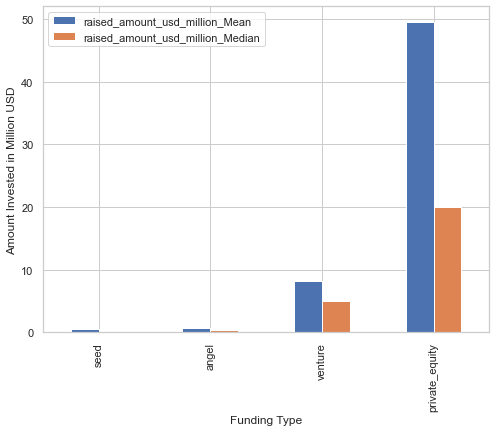

In [1509]:
## plotting mean and median
Invested_Amount_Summary.sort_values(by='raised_amount_usd_million_Mean')\
    .plot.bar(xlabel='Funding Type', ylabel='Amount Invested in Million USD',figsize=(8,6))

plt.show()
#plt.figure(figsize=(12,8))
#sns.set_theme(style="whitegrid")
#sns.boxplot(x=master_frame['funding_round_type'], y=master_frame['raised_amount_usd'], hue= master_frame['funding_round_type'])
#plt.show()

# Checkpoint 3: Country Analysis

### Now we know the suitable funding type, let's select only 'venture' funding type and discard others

In [1510]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [1511]:
## creating dataframe of top 9 countries with the highest invested amount

top_sum = pd.DataFrame(master_frame.groupby(master_frame['country_code'])['raised_amount_usd_million']\
                    .sum().sort_values(ascending=False))

top9 = top_sum.head(9)

In [1512]:
top9

,raised_amount_usd_million
country_code,
USA,422510.843
CHN,39835.419
GBR,20245.627
IND,14391.859
CAN,9583.332
FRA,7259.537
ISR,6907.515
DEU,6346.960
JPN,3363.677


In [1518]:
top9.loc[['USA','GBR','IND']]

,raised_amount_usd_million
country_code,
USA,422510.843
GBR,20245.627
IND,14391.859


### After checking the countries with the English as an official language from the wiki page, top 3 english speaking countries in the dataframe top9 with the highest invested amounts are USA, GBR & IND

# Checkpoint 4: Sector Analysis 1

In [1519]:
## Now, we know what 3 countries we want to invest. Let's include only these countries and remove all other countries
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]

In [1520]:
master_frame.shape

(39018, 7)

In [1521]:
## Creating a new column Primary_sector from category_list by splitting it and selecting the first category
master_frame['Primary_Sector'] = master_frame['category_list'].str.split('|').str[0]

master_frame = master_frame.drop('category_list', axis=1)

In [1522]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd_million,permalink,name,country_code,Primary_Sector
0,/organization/-fame,venture,10.000,/organization/-fame,#fame,IND,Media
6,/organization/0xdata,venture,20.000,/organization/0xdata,h2o.ai,USA,Analytics
7,/organization/0xdata,venture,1.700,/organization/0xdata,h2o.ai,USA,Analytics
8,/organization/0xdata,venture,8.900,/organization/0xdata,h2o.ai,USA,Analytics
13,/organization/1-mainstream,venture,5.000,/organization/1-mainstream,1 mainstream,USA,Apps


#### Loading the mapping file into a dataframe to merge it with our main dataframe

In [1523]:
mapping = pd.read_csv('mapping.csv')

In [1531]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


#### Evaluating the mapping dataframe

In [1532]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [1533]:
mapping.dtypes

category_list                              object
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object

In [1534]:
mapping.shape

(688, 10)

#### After checking the df, the data seems to scattered into diff column with values 1 and 0. 
#### There are multiple ways to handle it and get the data we want. I am going to use pd.melt() to solve this.

In [1535]:
## finding the parameter values which are typically column names 

#value_vars contains all the columns where you want to apply this function
value_vars = list(mapping.columns[1:])
print(f'value_vars : {value_vars}\n')

# whereas id_vars acts as an index or id
id_vars = list(np.setdiff1d(list(mapping.columns), value_vars))
print(f'id_vars : {id_vars}')

value_vars : ['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']

id_vars : ['category_list']


In [1536]:
## using the melt function & selecting the required data and dropping unnecessary column
mapping_new = pd.melt(mapping, id_vars=id_vars, value_vars=value_vars)

mapping_new = mapping_new[mapping_new.value == 1]

mapping_new = mapping_new.drop('value', axis=1)

In [1537]:
mapping_new.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


#### Merging the mapping dataframe to master dataframe and renaming the column to Main_Sector

In [1539]:
master_frame = master_frame.merge(mapping_new, how='left', left_on='Primary_Sector', right_on='category_list')

master_frame = master_frame.rename(columns = {'variable':'Main_Sector'})

In [1541]:
master_frame.shape

(39018, 9)

In [1542]:
## Checking if Main_sector have any null values
master_frame['Main_Sector'].isnull().sum()

2616

In [1543]:
## Checking the Main_Sector added to our master frame... Since we don't need 'Blanks' I am going to remove it
master_frame['Main_Sector'].unique()

array(['Entertainment', nan, 'News, Search and Messaging', 'Others',
       'Health', 'Cleantech / Semiconductors', 'Manufacturing',
       'Social, Finance, Analytics, Advertising', 'Automotive & Sports',
       'Blanks'], dtype=object)

In [1544]:
## Removing all the rows with null and 'Blanks' Main_Sector
master_frame = master_frame[master_frame.Main_Sector.notnull()]

master_frame = master_frame[~(master_frame.Main_Sector == 'Blanks')]

## dropping category_list column as it's a duplicate of Primary_Sector
master_frame = master_frame.drop('category_list', axis=1)

### Master frame with Primary & Main Sector

In [1545]:
master_frame.shape

(36187, 8)

In [1546]:
master_frame

,company_permalink,funding_round_type,raised_amount_usd_million,permalink,name,country_code,Primary_Sector,Main_Sector
0,/organization/-fame,venture,10.000,/organization/-fame,#fame,IND,Media,Entertainment
4,/organization/1-mainstream,venture,5.000,/organization/1-mainstream,1 mainstream,USA,Apps,"News, Search and Messaging"
5,/organization/10-minutes-with,venture,4.000,/organization/10-minutes-with,10 minutes with,GBR,Education,Others
6,/organization/1000memories,venture,2.520,/organization/1000memories,1000memories,USA,Curated Web,"News, Search and Messaging"
7,/organization/1000museums-com,venture,0.266,/organization/1000museums-com,1000museums.com,USA,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...
39013,/organization/zyomyx-inc,venture,12.000,/organization/zyomyx-inc,zyomyx,USA,Biotechnology,Cleantech / Semiconductors
39014,/organization/zyomyx-inc,venture,14.220,/organization/zyomyx-inc,zyomyx,USA,Biotechnology,Cleantech / Semiconductors
39015,/organization/zyomyx-inc,venture,0.555,/organization/zyomyx-inc,zyomyx,USA,Biotechnology,Cleantech / Semiconductors
39016,/organization/zyrra,venture,0.141,/organization/zyrra,zyrra,USA,E-Commerce,Others


# Checkpoint 5: Sector Analysis 2

#### Let's create the separate dataframes D1, D2 & D3 for each of the three top english speaking countries USA, GBR & IND with funding type as 'Venture' in range 5-15 million

In [1547]:
## For country USA
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['funding_round_type'] == 'venture') & \
            (master_frame['raised_amount_usd_million'] >= 5.0) & (master_frame['raised_amount_usd_million'] <= 15.0)]

## For country GBR
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['funding_round_type'] == 'venture') & \
            (master_frame['raised_amount_usd_million'] >= 5.0) & (master_frame['raised_amount_usd_million'] <= 15.0)]

## For country IND
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['funding_round_type'] == 'venture') & \
            (master_frame['raised_amount_usd_million'] >= 5.0) & (master_frame['raised_amount_usd_million'] <= 15.0)]

#### Checking whether the new dataframes have all the columns and correct data that we need for analysis and recreating index for them

In [1548]:
D1.reset_index(drop=True,inplace=True)
D1.head()

,company_permalink,funding_round_type,raised_amount_usd_million,permalink,name,country_code,Primary_Sector,Main_Sector
0,/organization/1-mainstream,venture,5.000,/organization/1-mainstream,1 mainstream,USA,Apps,"News, Search and Messaging"
1,/organization/128-technology,venture,11.999,/organization/128-technology,128 technology,USA,Service Providers,Others
2,/organization/1366-technologies,venture,15.000,/organization/1366-technologies,1366 technologies,USA,Manufacturing,Manufacturing
3,/organization/1366-technologies,venture,5.000,/organization/1366-technologies,1366 technologies,USA,Manufacturing,Manufacturing
4,/organization/1366-technologies,venture,5.150,/organization/1366-technologies,1366 technologies,USA,Manufacturing,Manufacturing


In [1549]:
D2.reset_index(drop=True,inplace=True)
D2.head()

,company_permalink,funding_round_type,raised_amount_usd_million,permalink,name,country_code,Primary_Sector,Main_Sector
0,/organization/365scores,venture,5.500,/organization/365scores,365scores,GBR,Android,"Social, Finance, Analytics, Advertising"
1,/organization/7digital,venture,8.468,/organization/7digital,7digital,GBR,Content Creators,Entertainment
2,/organization/7digital,venture,10.000,/organization/7digital,7digital,GBR,Content Creators,Entertainment
3,/organization/90min,venture,15.000,/organization/90min,90min,GBR,Media,Entertainment
4,/organization/90min,venture,5.800,/organization/90min,90min,GBR,Media,Entertainment


In [1550]:
D3.reset_index(drop=True,inplace=True)
D3.head()

,company_permalink,funding_round_type,raised_amount_usd_million,permalink,name,country_code,Primary_Sector,Main_Sector
0,/organization/-fame,venture,10.000,/organization/-fame,#fame,IND,Media,Entertainment
1,/organization/21diamonds-india,venture,6.370,/organization/21diamonds-india,21diamonds,IND,E-Commerce,Others
2,/organization/adlabs-imagica,venture,8.180,/organization/adlabs-imagica,adlabs imagica,IND,Entertainment,Entertainment
3,/organization/akosha,venture,5.000,/organization/akosha,akosha,IND,Consumer Internet,"Social, Finance, Analytics, Advertising"
4,/organization/amagi-media-labs,venture,5.500,/organization/amagi-media-labs,amagi media labs,IND,Advertising,"Social, Finance, Analytics, Advertising"


#### Let's start the analysis...

In [1551]:
## Finding the total number of investments

print(f'The total number of investments in USA (United States) is {D1.shape[0]}')

print(f'The total number of investments in GBR (Great Britain or United Kingdom) is {D2.shape[0]}')

print(f'The total number of investments in IND (India) is {D3.shape[0]}')

## Alternatively, we can use len(df.index) or simply Main sector or amount invested column count. 
#As we have removed all the null values and not required 'Blanks' sector, we will get correct observations

The total number of investments in USA (United States) is 11149
The total number of investments in GBR (Great Britain or United Kingdom) is 577
The total number of investments in IND (India) is 299


In [1552]:
## Finding the total amount of investment (USD)

print(f'The total amount of investment in USA (United States) is {D1.raised_amount_usd_million.sum()*10**6} USD')

print(f'The total amount of investment in GBR (Great Britain or United Kingdom) is {D2.raised_amount_usd_million.sum()*10**6} USD')

print(f'The total amount of investment in IND (India) is {D3.raised_amount_usd_million.sum()*10**6} USD')

The total amount of investment in USA (United States) is 99661524549.0 USD
The total amount of investment in GBR (Great Britain or United Kingdom) is 5028704358.000001 USD
The total amount of investment in IND (India) is 2683537552.0 USD


### Finding the main sectors based on number of investments

#### USA Top 3 sectors

In [1553]:
## USA main sectors based on number of investments using groupby

D1_USA_num_inv = pd.DataFrame(D1.groupby([D1['Main_Sector'],D1['country_code']])['Main_Sector'].count().sort_values(ascending=False))

## Renaming column because the count col and Main sector index both are named as Main sector. So i am unable to reset the index
D1_USA_num_inv = D1_USA_num_inv.rename(columns={'Main_Sector': 'Count'})

In [1554]:
## Top 3 sector names in USA with number of investments and creating new df to use it for plot 3

D1_USA_top3 = D1_USA_num_inv.reset_index().iloc[0:3,:]
D1_USA_top3 = D1_USA_top3.rename(columns={'country_code': 'Country'})

print(D1_USA_top3)

                               Main_Sector Country  Count
0                                   Others     USA   2923
1               Cleantech / Semiconductors     USA   2297
2  Social, Finance, Analytics, Advertising     USA   1912


#### GBR Top 3 sectors

In [1555]:
## GBR main sectors based on number of investments using groupby

D2_GBR_num_inv = pd.DataFrame(D2.groupby([D2['Main_Sector'],D2['country_code']])['Main_Sector'].count().sort_values(ascending=False))

## Renaming column because the count col and Main sector index both are named as Main sector. So i am unable to reset the index
D2_GBR_num_inv = D2_GBR_num_inv.rename(columns={'Main_Sector': 'Count'})

In [1556]:
## Top 3 sector names in GBR with number of investments and creating new df to use it for plot 3

D2_GBR_top3 = D2_GBR_num_inv.reset_index().iloc[0:3,:]
D2_GBR_top3 = D2_GBR_top3.rename(columns={'country_code': 'Country'})

print(D2_GBR_top3)

                               Main_Sector Country  Count
0                                   Others     GBR    143
1               Cleantech / Semiconductors     GBR    127
2  Social, Finance, Analytics, Advertising     GBR     98


#### IND Top 3 sectors

In [1557]:
## IND main sectors based on number of investments using groupby

D3_IND_num_inv = pd.DataFrame(D3.groupby([D3['Main_Sector'],D3['country_code']])['Main_Sector'].count().sort_values(ascending=False))

## Renaming column because the count col and Main sector index both are named as Main sector. So i am unable to reset the index
D3_IND_num_inv = D3_IND_num_inv.rename(columns={'Main_Sector': 'Count'})

In [1558]:
## Top 3 sector names in GBR with number of investments and creating new df to use it for plot 3

D3_IND_top3 = D3_IND_num_inv.reset_index().iloc[0:3,:]
D3_IND_top3 = D3_IND_top3.rename(columns={'country_code': 'Country'})

print(D3_IND_top3)

                  Main_Sector Country  Count
0                      Others     IND    109
1  News, Search and Messaging     IND     52
2               Entertainment     IND     33


### Finding the companies which have received the highest investment in top and second best sector

#### Highest investment companies in Top sector 'Others'

#### USA

In [1559]:
## For sector 'Others', grouping the dataframe to get the sum to find the company which has received the highest
# investment in USA

D1[D1.Main_Sector == 'Others'].groupby([D1['permalink'], D1['name']])['raised_amount_usd_million']\
                                        .sum().sort_values(ascending=False).head(1)

permalink                  name       
/organization/virtustream  virtustream   64.300
Name: raised_amount_usd_million, dtype: float64

#### GBR

In [1560]:
## For sector 'Others', grouping the dataframe to get the sum to find the company which has received the highest
# investment in GBR

D2[D2.Main_Sector == 'Others'].groupby([D2['permalink'], D2['name']])['raised_amount_usd_million']\
                                        .sum().sort_values(ascending=False).head(1)

permalink                     name          
/organization/electric-cloud  electric cloud   37.000
Name: raised_amount_usd_million, dtype: float64

#### IND

In [1561]:
## For sector 'Others', grouping the dataframe to get the sum to find the company which has received the highest
# investment in IND

D3[D3.Main_Sector == 'Others'].groupby([D3['permalink'], D3['name']])['raised_amount_usd_million']\
                                        .sum().sort_values(ascending=False).head(1)

permalink                   name        
/organization/firstcry-com  firstcry.com   39.000
Name: raised_amount_usd_million, dtype: float64

#### Highest investment companies in second best sectors (USA = 'Cleantech / Semiconductors', GBR = 'Cleantech / Semiconductors', IND = 'News, Search and Messaging'

#### USA

In [1562]:
## For sector 'Cleantech / Semiconductors', grouping the dataframe to get the sum to find the company which has 
# received the highest investment in USA

D1[D1.Main_Sector == 'Cleantech / Semiconductors'].groupby([D1['permalink'], D1['name']])['raised_amount_usd_million']\
                                        .sum().sort_values(ascending=False).head(1)

permalink               name    
/organization/biodesix  biodesix   75.300
Name: raised_amount_usd_million, dtype: float64

#### GBR

In [1563]:
## For sector 'Cleantech / Semiconductors', grouping the dataframe to get the sum to find the company which has 
# received the highest investment in GBR

D2[D2.Main_Sector == 'Cleantech / Semiconductors'].groupby([D2['permalink'], D2['name']])['raised_amount_usd_million']\
                                        .sum().sort_values(ascending=False).head(1)

permalink                  name       
/organization/eusa-pharma  eusa pharma   35.600
Name: raised_amount_usd_million, dtype: float64

#### IND

In [1564]:
## For sector 'News, Search and Messaging', grouping the dataframe to get the sum to find the company which has 
# received the highest investment in IND

D3[D3.Main_Sector == 'News, Search and Messaging'].groupby([D3['permalink'], D3['name']])['raised_amount_usd_million']\
                                        .sum().sort_values(ascending=False).head(1)

permalink                                       name   
/organization/gupshup-technology-india-pvt-ltd  gupshup   33.000
Name: raised_amount_usd_million, dtype: float64

# Checkpoint 6: Plots

#### I have a dataframe 'Invested_Amount_Mean' which i created during funding type analysis, I am going to use it for 1st plot showing the representative amount of investment in each funding type

In [1565]:
## But first lets sort the dataframe
Invested_Amount_Mean = Invested_Amount_Mean.sort_values(by='raised_amount_usd_million').reset_index(drop=True)

### Plot 1

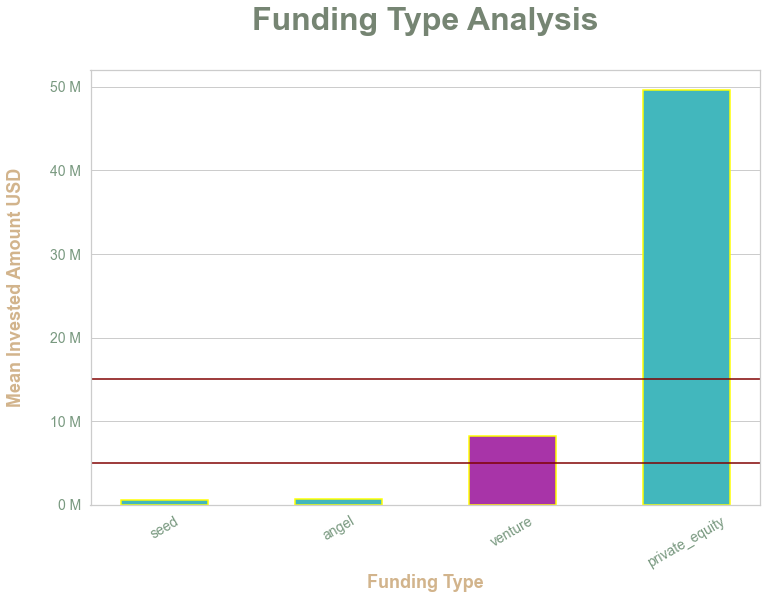

In [1567]:
## increasing the plot size
plt.gcf().set_size_inches(12,8)

## plotting the bar with fund type and their mean values
plt.bar(Invested_Amount_Mean['funding_round_type'], Invested_Amount_Mean['raised_amount_usd_million'],
          width=0.5, align='center', linewidth=1.5, edgecolor ='yellow',color=['#42b7bd','#42b7bd','#a834a8','#42b7bd'])

## checking with seaborn
#sns.set_style('whitegrid')
#ax = sns.barplot(data=Invested_Amount_Mean, x='funding_round_type', y='raised_amount_usd_million',
       #linewidth=1.5, edgecolor ='yellow', palette=['#42b7bd','#42b7bd','#a834a8','#42b7bd'])
#hue='funding_round_type', dodge=False

## setting the title and labels
plt.title('Funding Type Analysis\n', fontdict = {'fontsize': 32, 'fontweight': 'bold', 'color': '#768573'})
plt.xlabel('Funding Type', fontdict={'fontsize':18, 'fontweight':'bold', 'color': 'tan'})
plt.ylabel('Mean Invested Amount USD\n', fontdict={'fontsize':18, 'fontweight':'bold', 'color': 'tan'})

## styling the ticks (rotating xticks to 30 deg and adding a M for million with the ytick values)
ticks = np.arange(0, 60, 10)
labels = [f'{i} M' for i in ticks]

plt.yticks(ticks, labels, fontsize=14, color='#799980')
plt.xticks(rotation=30, fontsize=14, color='#799980')

## using the horizontal line to show the types which falls under 5-15million limit
plt.axhline(5, color='maroon')
plt.axhline(15, color='maroon')

## using grid function to remove vertical lines
plt.grid(b=None, axis='x')
plt.show()

### Plot 2

In [1568]:
## Let's use the already created top9 dataframe by re-setting the index so that we can plot sum against countries
top_countries = top9.reset_index()

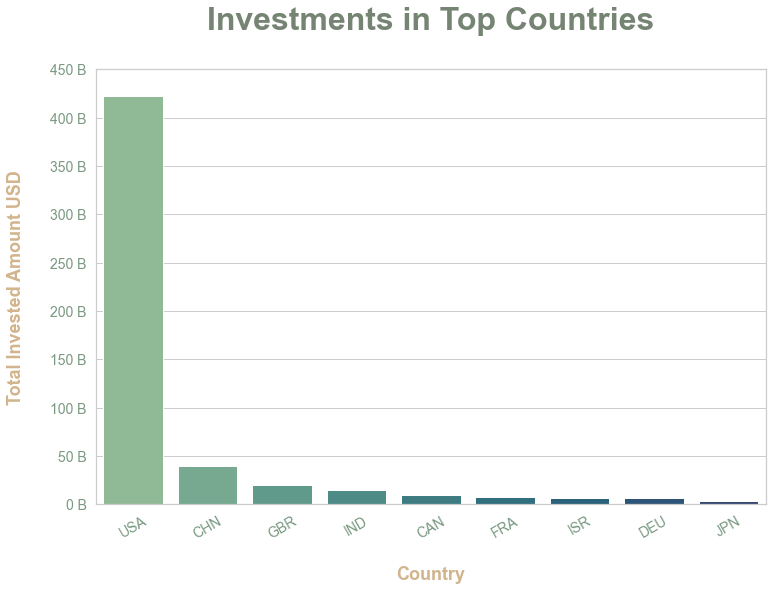

In [1569]:
## increasing the plot size and setting the grid style
plt.gcf().set_size_inches(12,8)
sns.set_style('whitegrid')

## plotting the bar with countries and their total investments
ax = sns.barplot(data=top_countries, x='country_code', y='raised_amount_usd_million', palette='crest')

## setting the title and labels
plt.title('Investments in Top Countries\n', fontdict={'fontsize':32, 'fontweight':'bold', 'color': '#768573'})
plt.xlabel('\nCountry', fontdict={'fontsize':18, 'fontweight':'bold', 'color': 'tan'})
plt.ylabel('Total Invested Amount USD\n', fontdict={'fontsize':18, 'fontweight':'bold', 'color': 'tan'})

## styling the ticks (rotating xticks to 30 deg and adding a B for billion with the ytick values)
ticks = np.arange(0, 500000, 50000)
labels = [f'{round(i/1000)} B' for i in ticks]

plt.yticks(ticks, labels, fontsize=14, color='#799980')
plt.xticks(rotation=30, fontsize=14, color='#799980')

plt.show()

### Plot 3

#### Let's use the dataframes D1_USA_top3, D2_GBR_top3 & D3_IND_top3 to plot number of investments in the top 3 sectors of the top 3 countries

#### I am going to concat all of the above mentioned dataframes to get the data in a single dataframe

In [1570]:
top3 = pd.concat([D1_USA_top3, D2_GBR_top3, D3_IND_top3])

## Renaming the column name for representation purpose
top3 = top3.rename(columns={'Main_Sector': 'Main Sector'})

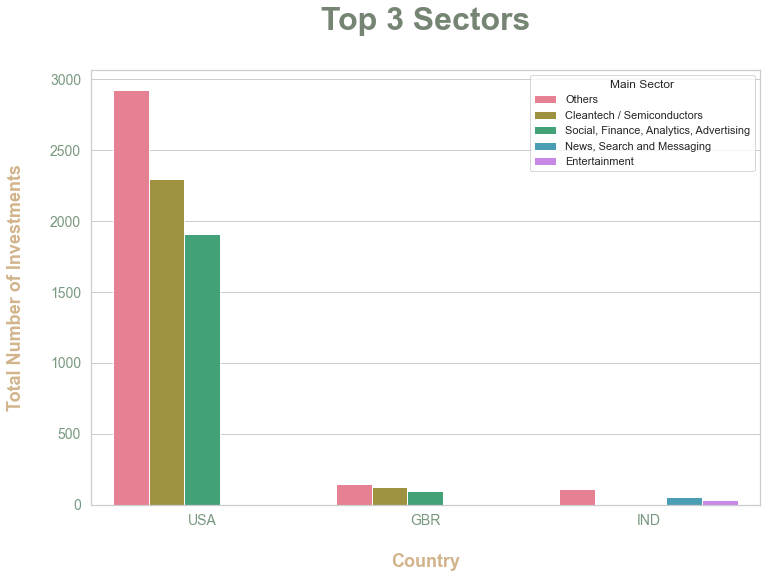

In [1571]:
## increasing the plot size and setting the grid style
plt.gcf().set_size_inches(12, 8)

## plotting the bar with countries top 3 sectors and number of investments
sns.barplot(data = top3, x='Country', y='Count', hue='Main Sector', palette='husl')

## setting the title, labels and ticks
plt.title('Top 3 Sectors\n', fontdict={'fontsize':32, 'fontweight':'bold', 'color': '#768573'})
plt.xlabel('\nCountry', fontdict={'fontsize':18, 'fontweight':'bold', 'color': 'tan'})
plt.ylabel('Total Number of Investments\n', fontdict={'fontsize':18, 'fontweight':'bold', 'color': 'tan'})

plt.yticks(fontsize=14, color='#799980')
plt.xticks(fontsize=14, color='#799980')

plt.show()

In [1274]:
import altair as alt

### Need to install the altair package first using pip

In [1431]:
## Alternate plot using altair

alt.BarConfig(align='center')

chart = alt.Chart(top3).mark_bar().encode(
    x='Country',
    y='Count',
    color='Country',
    column='Main Sector'
).properties(
    width=145,
    height=190
)

chart.configure_header(
    titleColor='green',
    titleFontSize=14,
    labelColor='seagreen',
    labelFontSize=10,
    labelAngle = 0
)

#chart.configure_axisX(title='Total Investments', titleY="Undefined")

alt.Chart(...)